# Q1

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

  Weekday  Avg Emails    Variance  Min Emails  Max Emails  Range
   Monday   54.923077 2217.217391         149         313    164
  Tuesday   55.384615 1645.478261         147         322    175
Wednesday   55.528846 1686.244565         186         344    158
 Thursday   52.346154  976.057971         151         295    144
   Friday   50.432692 1497.824275         135         292    157
 Saturday   21.076923  488.492754          55         142     87
   Sunday   18.461538  476.260870          46         116     70


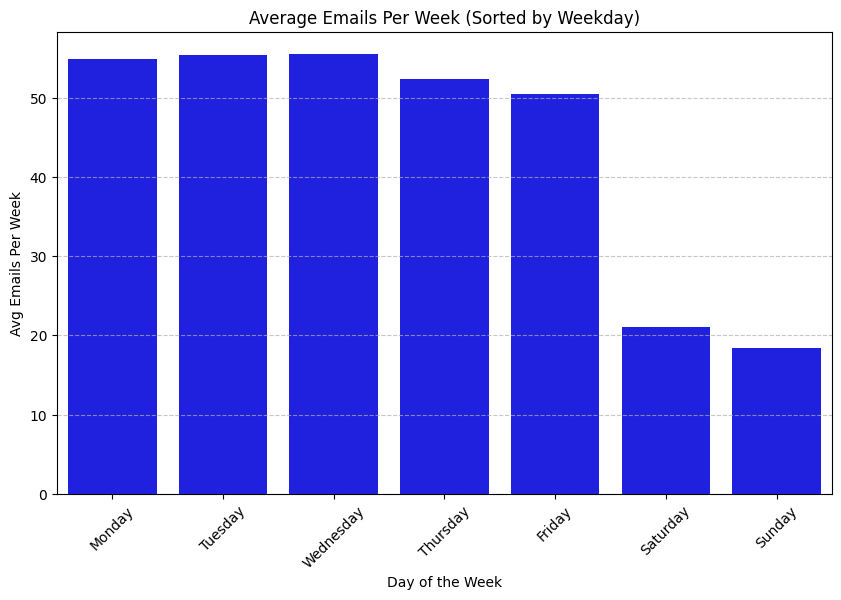

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("unfiltered-2023-24.csv", delimiter=";")

days = {"Sun": "Sunday", "Mon": "Monday", "Tue": "Tuesday",
    "Wed": "Wednesday", "Thu": "Thursday", "Fri": "Friday", "Sat": "Saturday"}
df["Weekday"] = df["day"].map(days)
week_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Filter data for 2023-2024
df = df[df["year"].isin([2023, 2024])]

# Group by year, month, weekday
weekly_counts = df.groupby(["year", "month", "Weekday"]).size().unstack().fillna(0)

# Calculate total weeks
weeks = 104
avg = weekly_counts.sum() / weeks
var = weekly_counts.var()
min_emails = weekly_counts.min()
max_emails = weekly_counts.max()
email_range = max_emails - min_emails

# Combine stats into a DataFrame
stats = pd.DataFrame({
    "Weekday": avg.index,
    "Avg Emails": avg.values,
    "Variance": var.values,
    "Min Emails": min_emails.values,
    "Max Emails": max_emails.values,
    "Range": email_range.values
})

# Sort by weekday order
stats["Weekday"] = pd.Categorical(stats["Weekday"], categories=week_order, ordered=True)
stats = stats.sort_values("Weekday")

print(stats.to_string(index=False))

# Plot average emails per weekday
plt.figure(figsize=(10, 6))
sns.barplot(x=stats["Weekday"], y=stats["Avg Emails"], color='blue')
plt.xlabel("Day of the Week")
plt.ylabel("Avg Emails Per Week")
plt.title("Average Emails Per Week (Sorted by Weekday)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Q4

We have two datasets : Filtered and unfiltered that contains useful emails all emails received by the professor over two years respectively.To compute the mails that are deleted:

To estimate the fraction of deleted emails, we can use the formula:
Deletion Rate =
 (no. of mails in unfiltered data - no. of mails in filtered data)/ (no. of mails in unfiltered data)


In [64]:
# Read both CSV files
unfiltered = pd.read_csv('/content/unfiltered-2023-24.csv', sep=';', low_memory=False)
filtered = pd.read_csv('/content/filtered-2012-24.csv', sep=';', low_memory=False)

# calculating length
total_received = len(unfiltered)
total_saved = len(filtered)
total_deleted = total_saved - total_received

# Compute fraction of emails deleted
fraction_deleted = total_deleted / total_saved if total_saved > 0 else 0

# Print the results with correct labels
print(f"Total Emails Received: {total_saved}")
print(f"Total Emails Saved: {total_received}")
print(f"Total Emails Deleted: {total_deleted}")
print(f"Fraction of Emails Deleted: {fraction_deleted:.2f}")

Total Emails Received: 84039
Total Emails Saved: 32691
Total Emails Deleted: 51348
Fraction of Emails Deleted: 0.61


# Q5

Find the total mails with HTML and without HTML and then calculate the fraction

In [74]:
import pandas as pd

# Load datasets
df_unfiltered = pd.read_csv("unfiltered-2023-24.csv", delimiter=";")
df_filtered = pd.read_csv("filtered-2012-24.csv", delimiter=";")

# Filter for 2023-2024
df_filtered = df_filtered[df_filtered["year"].isin([2023, 2024])]

# Count emails with/without HTML
html_unfiltered = df_unfiltered["html"].sum()
non_html_unfiltered = len(df_unfiltered) - html_unfiltered
html_filtered = df_filtered["html"].sum()
non_html_filtered = len(df_filtered) - html_filtered

# Deletion rates
delete_rate_html = 1 - html_filtered / html_unfiltered if html_unfiltered else 0
delete_rate_non_html = 1 - non_html_filtered / non_html_unfiltered if non_html_unfiltered else 0

# Print results
print(f"HTML Emails: {html_unfiltered}, Non-HTML Emails: {non_html_unfiltered}")
print(f"Saved HTML: {html_filtered}, Saved Non-HTML: {non_html_filtered}")
print(f"HTML Deletion Rate: {delete_rate_html:.2%}")
print(f"Non-HTML Deletion Rate: {delete_rate_non_html:.2%}")

# Compare deletion rates
if delete_rate_html > delete_rate_non_html:
    print("HTML emails are more likely to be deleted.")
elif delete_rate_html < delete_rate_non_html:
    print("Non-HTML emails are more likely to be deleted.")
else:
    print("No significant difference in deletion rates.")


HTML Emails: 25717, Non-HTML Emails: 6974
Saved HTML: 10532, Saved Non-HTML: 1924
HTML Deletion Rate: 59.05%
Non-HTML Deletion Rate: 72.41%
Non-HTML emails are more likely to be deleted.


<ipython-input-74-1a91212e1b53>:5: DtypeWarning:

Columns (1,4) have mixed types. Specify dtype option on import or set low_memory=False.



# Q6

In [75]:
import pandas as pd

# Load datasets
df_u = pd.read_csv("/content/unfiltered-2023-24.csv", delimiter=";")
df_f = pd.read_csv("/content/filtered-2012-24.csv", delimiter=";")

# Filter for 2023-2024
df_f = df_f[df_f["year"].isin([2023, 2024])]

# Check for attachments
df_u["att"] = df_u[["pdf", "doc", "ppt", "image"]].any(axis=1)
df_f["att"] = df_f[["pdf", "doc", "ppt", "image"]].any(axis=1)

# Count emails with/without attachments
with_att_u = df_u["att"].sum()
without_att_u = len(df_u) - with_att_u
with_att_f = df_f["att"].sum()
without_att_f = len(df_f) - with_att_f

# Calculate deletion rates
del_rate_att = 1 - (with_att_f / with_att_u) if with_att_u else 0
del_rate_no_att = 1 - (without_att_f / without_att_u) if without_att_u else 0

# Print results
print(f"With Attachments: {with_att_u}, Without: {without_att_u}")
print(f"Saved With: {with_att_f}, Saved Without: {without_att_f}")
print(f"Del. Rate With Attachments: {del_rate_att:.2%}")
print(f"Del. Rate Without Attachments: {del_rate_no_att:.2%}")

# Compare deletion rates
if del_rate_att > del_rate_no_att:
    print("With attachments more likely deleted.")
elif del_rate_att < del_rate_no_att:
    print("Without attachments more likely deleted.")
else:
    print("No significant difference.")


With Attachments: 3549, Without: 29142
Saved With: 2180, Saved Without: 10276
Del. Rate With Attachments: 38.57%
Del. Rate Without Attachments: 64.74%
Without attachments more likely deleted.


<ipython-input-75-0197f6dd2c7a>:5: DtypeWarning:

Columns (1,4) have mixed types. Specify dtype option on import or set low_memory=False.



# Q7

In [82]:
file_path = "/content/unfiltered-2023-24.csv"
df = pd.read_csv(file_path,delimiter=';')

# Count the number of emails received for each unique (year, month) combination.

email_counts = df.groupby(['year', 'month']).size().reset_index(name='email_count')
email_counts = email_counts.sort_values(by=['year', 'month'])

# Converting 'year' and 'month' to a readable format
email_counts['Year-Month'] = email_counts['year'].astype(str) + '-' + email_counts['month'].astype(str).str.zfill(2)


In [105]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
X = email_counts[['num_months']]
y = email_counts['email_count']

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict email counts based on the regression model
email_counts['predicted'] = model.predict(X)

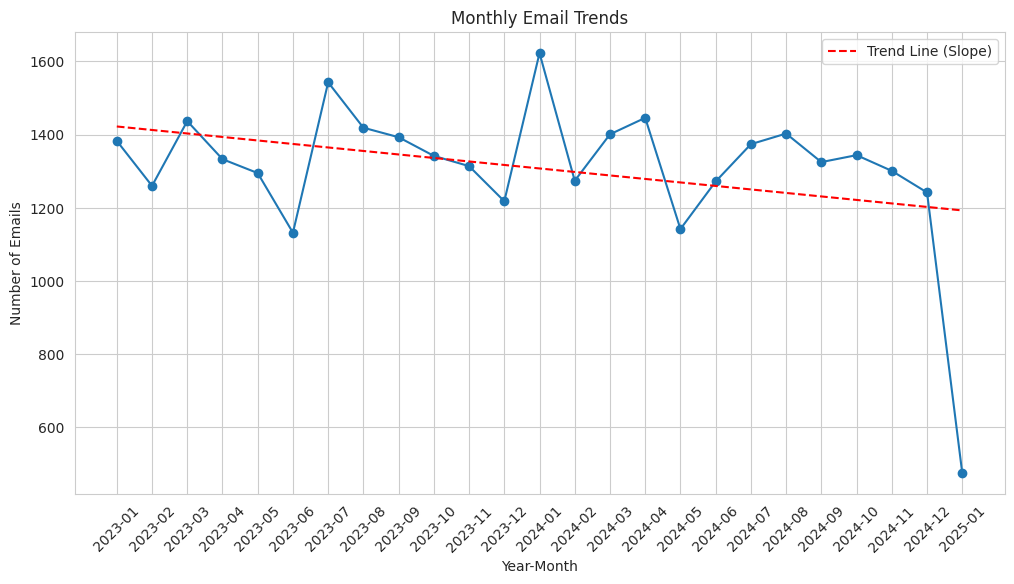

Slope of the trend line: -9.56


In [104]:
#Plotting the  trend

plt.figure(figsize=(12, 6))
plt.plot(email_counts['Year-Month'], email_counts['email_count'], marker='o', linestyle='-')
plt.plot(email_counts['Year-Month'], email_counts['predicted'], linestyle='--', color='red', label='Trend Line (Slope)')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.xlabel("Year-Month")
plt.ylabel("Number of Emails")
plt.title("Monthly Email Trends")
plt.legend()
plt.grid(True)
plt.show()

print(f"Slope of the trend line: {model.coef_[0]:.2f}")

So , we can see that slope of the trend line is negative which implies that the overall email traffic will be decreasing.

# Q8

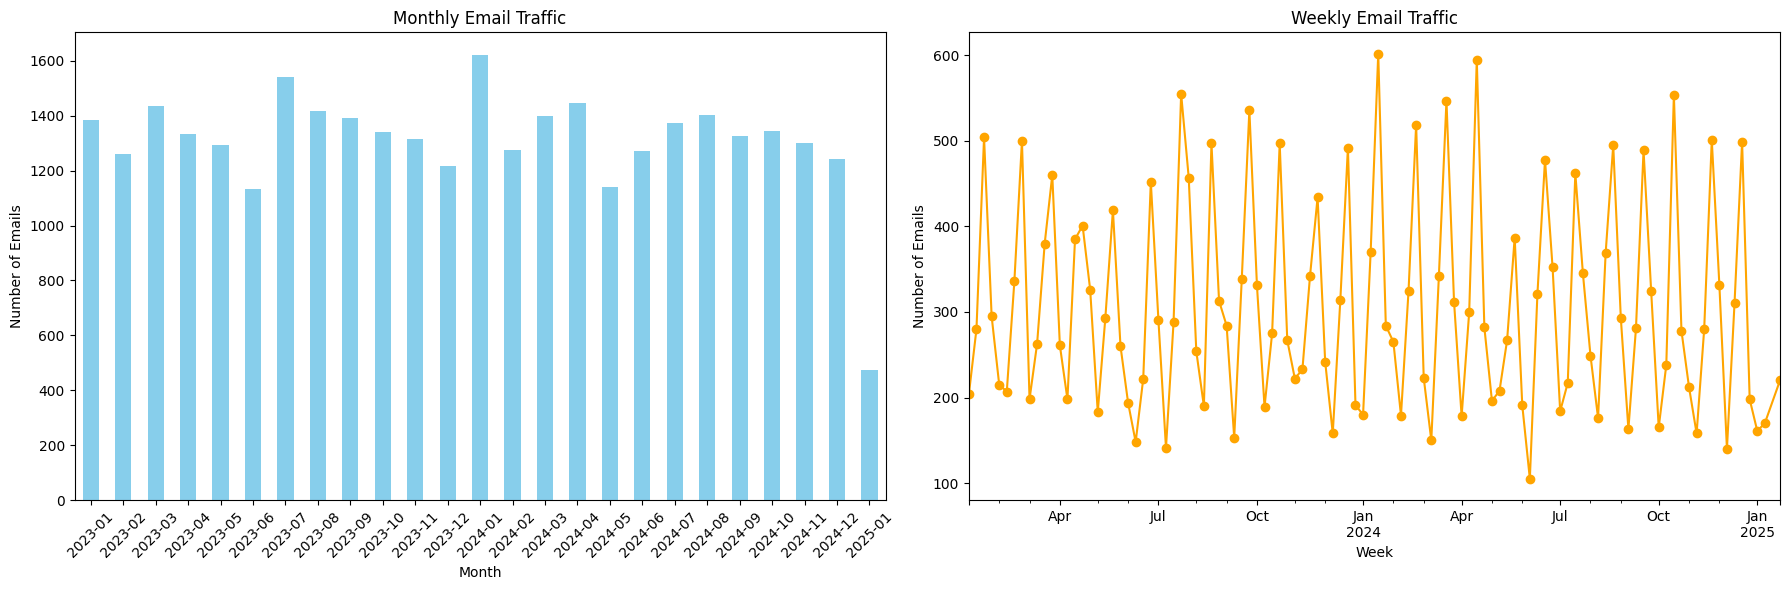

Max month: 2024-01 with 1623 emails.
Max week: 2024-01-15/2024-01-21 with 602 emails.


In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('unfiltered-2023-24.csv', delimiter=';')

# Map months to numeric values
month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
             'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

# Process datetime columns
df.rename(columns={'date': 'day_num'}, inplace=True)
df['month_num'] = df['month'].map(month_map)
df['hour'] = df['time'].str[:2].astype(int)
df['minute'] = df['time'].str[3:5].astype(int)
df['second'] = df['time'].str[6:8].astype(int)
df['datetime'] = pd.to_datetime({
    'year': df['year'],
    'month': df['month_num'],
    'day': df['day_num'],
    'hour': df['hour'],
    'minute': df['minute'],
    'second': df['second']
})

# Group by month and week, then count emails
monthly = df.groupby(df['datetime'].dt.to_period('M')).size()
weekly = df.groupby(df['datetime'].dt.to_period('W')).size()

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot Monthly Email Traffic (Bar Chart)
monthly.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('Monthly Email Traffic')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of Emails')
axes[0].tick_params(axis='x', rotation=45)

# Plot Weekly Email Traffic (Line Chart)
weekly.plot(kind='line', marker='o', color='orange', ax=axes[1])
axes[1].set_title('Weekly Email Traffic')
axes[1].set_xlabel('Week')
axes[1].set_ylabel('Number of Emails')

# Adjust layout to ensure the plots fit within the figure
plt.tight_layout()
plt.show()

# Get the max month and week email traffic
max_month = monthly.idxmax()
max_month_emails = monthly.max()
max_week = weekly.idxmax()
max_week_emails = weekly.max()

# Print results
print(f"Max month: {max_month} with {max_month_emails} emails.")
print(f"Max week: {max_week} with {max_week_emails} emails.")


# Q9

We have to make the predictions using historical email data, using regressiion model that can be extended to the future.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



Forecasted emails on the coming Monday: 46
Forecasted emails in the coming week: 1334


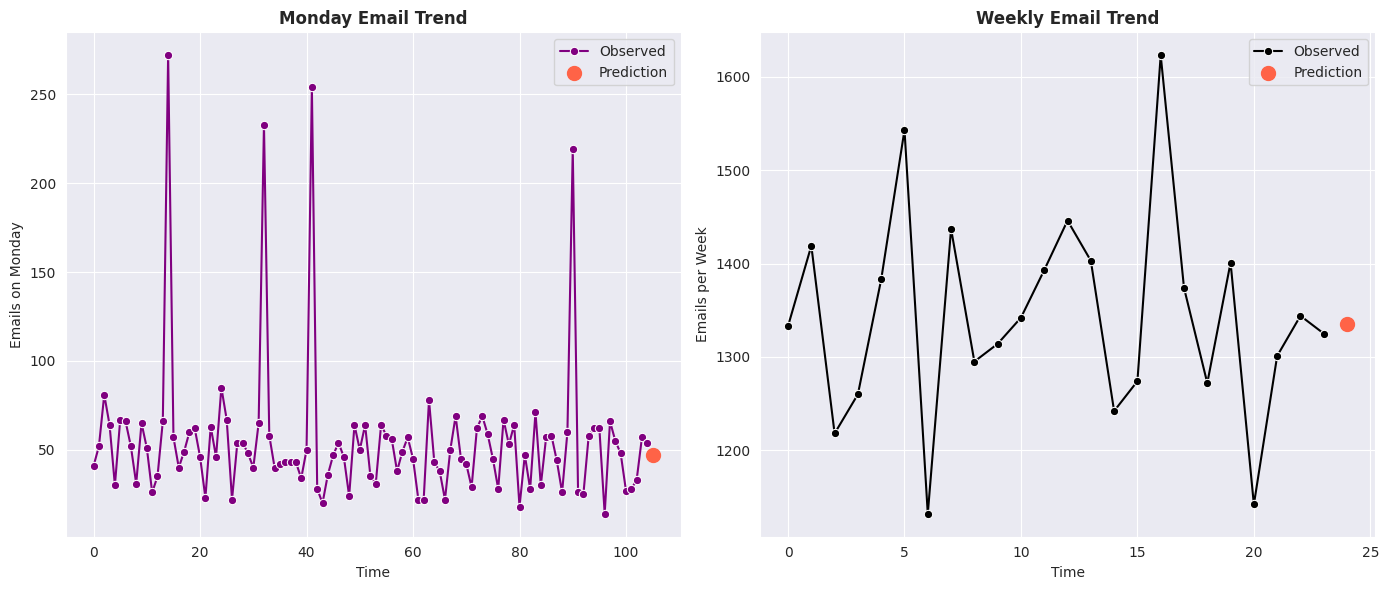

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LinearRegression
import numpy as np

# Load and clean data
df = pd.read_csv('unfiltered-2023-24.csv', delimiter=';')
df = df[df['year'].isin([2023, 2024])]
df.columns = df.columns.str.strip()

# Function to get weekday name
def get_weekday(row):
    try:
        return datetime.strptime(f"{row['year']} {row['month']} {row['date']}", "%Y %b %d").strftime("%a")
    except ValueError:
        return row['day']

# Apply function to get weekdays
df['day'] = df.apply(get_weekday, axis=1)

# Forecast emails on Mondays
mon_df = df[df['day'] == 'Mon'].groupby(['year', 'month', 'date']).size().reset_index(name='emails')
mon_df['index'] = np.arange(len(mon_df))

X_mon = mon_df[['index']]
y_mon = mon_df['emails']

mon_model = LinearRegression().fit(X_mon, y_mon)
mon_pred = mon_model.predict([[len(mon_df)]])[0]
print(f'Forecasted emails on the coming Monday: {int(mon_pred)}')

# Forecast weekly emails
wk_df = df.groupby(['year', 'month']).size().reset_index(name='emails')
wk_df['index'] = np.arange(len(wk_df))

X_wk = wk_df[['index']]
y_wk = wk_df['emails']

wk_model = LinearRegression().fit(X_wk, y_wk)
wk_pred = wk_model.predict([[len(wk_df)]])[0]
print(f'Forecasted emails in the coming week: {int(wk_pred)}')

# Plotting the results
plt.figure(figsize=(14, 6))

# Plot Monday Emails
plt.subplot(1, 2, 1)
sns.set_style("darkgrid")
sns.lineplot(x=mon_df.index, y=mon_df['emails'], marker='o', linestyle='-', color='purple', label='Observed')
plt.scatter(mon_df.index[-1] + 1, mon_pred, color='tomato', s=100, label='Prediction')
plt.title('Monday Email Trend', fontsize=12, fontweight='bold')
plt.xlabel('Time', fontsize=10)
plt.ylabel('Emails on Monday', fontsize=10)
plt.legend()

# Plot Weekly Emails
plt.subplot(1, 2, 2)
sns.set_style("darkgrid")
sns.lineplot(x=wk_df.index, y=wk_df['emails'], marker='o', linestyle='-', color='black', label='Observed')
plt.scatter(wk_df.index[-1] + 1, wk_pred, color='tomato', s=100, label='Prediction')
plt.title('Weekly Email Trend', fontsize=12, fontweight='bold')
plt.xlabel('Time', fontsize=10)
plt.ylabel('Emails per Week', fontsize=10)
plt.legend()

plt.tight_layout()
plt.show()
